## Getting the data

http://people.dbmi.columbia.edu/~friedma/Projects/DiseaseSymptomKB/index.html

Copy the table from this link and paste it into a csv file named `dataset_uncleaned.csv`. Then follow the next steps for preprocessing.

## Cleaning our data

In [5]:
import pandas as pd

In [6]:
import csv
from collections import defaultdict

disease_list = []

def return_list(disease):
    disease_list = []
    match = disease.replace('^','_').split('_')
    ctr = 1
    for group in match:
        if ctr%2==0:
            disease_list.append(group)
        ctr = ctr + 1

    return disease_list

with open("Scraped-Data/dataset_uncleaned.csv") as csvfile:
    reader = csv.reader(csvfile)
    disease=""
    weight = 0
    disease_list = []
    dict_wt = {}
    dict_=defaultdict(list)
    for row in reader:

        if row[0]!="\xc2\xa0" and row[0]!="":
            disease = row[0]
            disease_list = return_list(disease)
            weight = row[1]

        if row[2]!="\xc2\xa0" and row[2]!="":
            symptom_list = return_list(row[2])

            for d in disease_list:
                for s in symptom_list:
                    dict_[d].append(s)
                dict_wt[d] = weight

    #print (dict_)

Writing our cleaned data

In [3]:
with open("Scraped-Data/dataset_clean.csv","w") as csvfile:
    writer = csv.writer(csvfile)
    for key,values in dict_.items():
        for v in values:
            #key = str.encode(key)
            key = str.encode(key).decode('utf-8')
            #.strip()
            #v = v.encode('utf-8').strip()
            #v = str.encode(v)
            writer.writerow([key,v,dict_wt[key]])

In [4]:
columns = ['Source','Target','Weight']

In [5]:
data = pd.read_csv("Scraped-Data/dataset_clean.csv",names=columns, encoding ="ISO-8859-1")

In [6]:
data.head()

Source    Target  Weight
0  cellulitis  erythema     341
1  cellulitis      pain     341
2  cellulitis  swelling     341
3  cellulitis   redness     341
4  cellulitis     fever     341

In [8]:
data.to_csv("Scraped-Data/dataset_clean.csv",index=False)

In [15]:
slist = []
dlist = []
with open("Scraped-Data/nodetable.csv","w") as csvfile:
    writer = csv.writer(csvfile)

    for key,values in dict_.items():
        for v in values:
            if v not in slist:
                writer.writerow([v,v,"symptom"])
                slist.append(v)
        if key not in dlist:
            writer.writerow([key,key,"disease"])
            dlist.append(key)

In [16]:
nt_columns = ['Id','Label','Attribute']

In [17]:
nt_data = pd.read_csv("Scraped-Data/nodetable.csv",names=nt_columns, encoding ="ISO-8859-1",)

In [18]:
nt_data.head()

Id     Label Attribute
0  erythema  erythema   symptom
1      pain      pain   symptom
2  swelling  swelling   symptom
3   redness   redness   symptom
4     fever     fever   symptom

In [19]:
nt_data.to_csv("Scraped-Data/nodetable.csv",index=False)

## Analysing our cleaned data

In [7]:
data = pd.read_csv("Scraped-Data/dataset_clean.csv", encoding ="ISO-8859-1")

In [8]:
data.head()

Source                   Target  Weight
0  depression mental         feeling suicidal    1337
1  depression mental                 suicidal    1337
2  depression mental  hallucinations auditory    1337
3  depression mental         feeling hopeless    1337
4  depression mental                weepiness    1337

In [9]:
len(data['Source'].unique())

149

In [10]:
len(data['Target'].unique())

405

In [11]:
df = pd.DataFrame(data)

In [12]:
df_1 = pd.get_dummies(df.Target)

In [13]:
df_1.head()

Heberden's node  Murphy's sign  Stahli's line  abdomen acute  \
0                0              0              0              0   
1                0              0              0              0   
2                0              0              0              0   
3                0              0              0              0   
4                0              0              0              0   

   abdominal bloating  abdominal tenderness  abnormal sensation  \
0                   0                     0                   0   
1                   0                     0                   0   
2                   0                     0                   0   
3                   0                     0                   0   
4                   0                     0                   0   

   abnormally hard consistency  abortion  abscess bacterial      ...        \
0                            0         0                  0      ...         
1                            0         0                  0      ...         
2                            0         0                  0      ...         
3                            0         0                  0      ...         
4                            0         0                  0      ...         

   vision blurred  vomiting  weepiness  weight gain  welt  wheelchair bound  \
0               0         0          0            0     0                 0   
1               0         0          0            0     0                 0   
2               0         0          0            0     0                 0   
3               0         0          0            0     0                 0   
4               0         0          1            0     0                 0   

   wheezing  withdraw  worry  yellow sputum  
0         0         0      0              0  
1         0         0      0              0  
2         0         0      0              0  
3         0         0      0              0  
4         0         0      0              0  

[5 rows x 404 columns]

In [14]:
df.head()

Source                   Target  Weight
0  depression mental         feeling suicidal    1337
1  depression mental                 suicidal    1337
2  depression mental  hallucinations auditory    1337
3  depression mental         feeling hopeless    1337
4  depression mental                weepiness    1337

In [15]:
df_s = df['Source']

In [16]:
df_pivoted = pd.concat([df_s,df_1], axis=1)

In [17]:
df_pivoted.drop_duplicates(keep='first',inplace=True)

In [18]:
df_pivoted[:5]

Source  Heberden's node  Murphy's sign  Stahli's line  \
0  depression mental                0              0              0   
1  depression mental                0              0              0   
2  depression mental                0              0              0   
3  depression mental                0              0              0   
4  depression mental                0              0              0   

   abdomen acute  abdominal bloating  abdominal tenderness  \
0              0                   0                     0   
1              0                   0                     0   
2              0                   0                     0   
3              0                   0                     0   
4              0                   0                     0   

   abnormal sensation  abnormally hard consistency  abortion      ...        \
0                   0                            0         0      ...         
1                   0                            0         0      ...         
2                   0                            0         0      ...         
3                   0                            0         0      ...         
4                   0                            0         0      ...         

   vision blurred  vomiting  weepiness  weight gain  welt  wheelchair bound  \
0               0         0          0            0     0                 0   
1               0         0          0            0     0                 0   
2               0         0          0            0     0                 0   
3               0         0          0            0     0                 0   
4               0         0          1            0     0                 0   

   wheezing  withdraw  worry  yellow sputum  
0         0         0      0              0  
1         0         0      0              0  
2         0         0      0              0  
3         0         0      0              0  
4         0         0      0              0  

[5 rows x 405 columns]

In [19]:
len(df_pivoted)

2116

In [20]:
cols = df_pivoted.columns

In [21]:
cols = cols[1:]

In [22]:
df_pivoted = df_pivoted.groupby('Source').sum()
df_pivoted = df_pivoted.reset_index()
df_pivoted[:5]

Source  Heberden's node  Murphy's sign  \
0                  Alzheimer's disease                0              0   
1                                  HIV                0              0   
2       Pneumocystis carinii pneumonia                0              0   
3             accident cerebrovascular                0              0   
4  acquired immuno-deficiency syndrome                0              0   

   Stahli's line  abdomen acute  abdominal bloating  abdominal tenderness  \
0              0              0                   0                     0   
1              0              0                   0                     0   
2              0              0                   0                     0   
3              0              0                   0                     0   
4              0              0                   0                     0   

   abnormal sensation  abnormally hard consistency  abortion      ...        \
0                   0                            0         0      ...         
1                   0                            0         0      ...         
2                   0                            0         0      ...         
3                   0                            0         0      ...         
4                   0                            0         0      ...         

   vision blurred  vomiting  weepiness  weight gain  welt  wheelchair bound  \
0               0         0          0            0     0                 1   
1               0         0          0            0     0                 0   
2               0         0          0            0     0                 0   
3               0         0          0            0     0                 0   
4               0         0          0            0     0                 0   

   wheezing  withdraw  worry  yellow sputum  
0         0         0      0              0  
1         0         0      0              0  
2         0         0      0              1  
3         0         0      0              0  
4         0         0      0              0  

[5 rows x 405 columns]

In [23]:
len(df_pivoted)

149

In [38]:
df_pivoted.to_csv("Scraped-Data/df_pivoted.csv")

In [24]:
x = df_pivoted[cols]
y = df_pivoted['Source']
print x[:5]
print y[:5]

   Heberden's node  Murphy's sign  Stahli's line  abdomen acute  \
0                0              0              0              0   
1                0              0              0              0   
2                0              0              0              0   
3                0              0              0              0   
4                0              0              0              0   

   abdominal bloating  abdominal tenderness  abnormal sensation  \
0                   0                     0                   0   
1                   0                     0                   0   
2                   0                     0                   0   
3                   0                     0                   0   
4                   0                     0                   0   

   abnormally hard consistency  abortion  abscess bacterial      ...        \
0                            0         0                  0      ...         
1                            0        

### Trying out our classifier to learn diseases from the symptoms

In [25]:
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import train_test_split

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [27]:
mnb = MultinomialNB()
mnb = mnb.fit(x_train, y_train)

In [28]:
mnb.score(x_test, y_test)

0.0

### Inferences on train and test split
It can't work on unseen data because it has never seen that disease before. Also, there is only one point for each disease and hence no point for this. So we need to train the model entirely. Then what will we test it on? Missing data? Say given one symptom what is the disease? This is again multilabel classification. We can work symptom on symptom. What exactly is differential diagnosis, we need to replicate that.

In [29]:
mnb_tot = MultinomialNB()
mnb_tot = mnb_tot.fit(x, y)

In [30]:
mnb_tot.score(x, y)

0.89932885906040272

In [31]:
disease_pred = mnb_tot.predict(x)

In [32]:
disease_real = y.values

In [33]:
for i in range(0, len(disease_real)):
    if disease_pred[i]!=disease_real[i]:
        print ('Pred: {0} Actual:{1}'.format(disease_pred[i], disease_real[i]))

UnicodeEncodeError: 'ascii' codec can't encode character u'\xa0' in position 8: ordinal not in range(128)

These are the predicted versus actual diseases that our classifier misclassifies.

### Training a decision tree

In [34]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [35]:
print ("DecisionTree")
dt = DecisionTreeClassifier()
clf_dt=dt.fit(x,y)
print ("Acurracy: ", clf_dt.score(x,y))

DecisionTree
('Acurracy: ', 0.89932885906040272)


In [51]:
from sklearn import tree 
from sklearn.tree import export_graphviz

export_graphviz(dt, 
                out_file='DOT-files/tree.dot', 
                feature_names=cols)

In [52]:
from IPython.display import Image
Image(filename='tree.png')

According to the plotted decision tree, `Jugular venous distention` is the attribute symptom that has the highest gini score of 0.9846. Thus this symptom would play a major role in predicting diseases.
<hr>

## Analysis of the Manual data

In [36]:
data = pd.read_csv("Manual-Data/Training.csv")

In [37]:
data.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0       0           0             0        0                 0   
1       0           0             0        0                 0   
2       0           0             0        0                 0   
3       0           0             0        0                 0   
4       0           0             0        0                 0   

         ...         blackheads  scurring  skin_peeling  silver_like_dusting  \
0        ...                  0         0             0                    0   
1        ...                  0         0             0                    0   
2        ...                  0         0             0                    0   
3        ...                  0         0             0                    0   
4        ...                  0         0             0                    0   

   small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                     0                   0        0                     0   
1                     0                   0        0                     0   
2                     0                   0        0                     0   
3                     0                   0        0                     0   
4                     0                   0        0                     0   

   yellow_crust_ooze         prognosis  
0                  0  Fungal infection  
1                  0  Fungal infection  
2                  0  Fungal infection  
3                  0  Fungal infection  
4                  0  Fungal infection  

[5 rows x 133 columns]

In [38]:
data.columns

Index([u'itching', u'skin_rash', u'nodal_skin_eruptions',
       u'continuous_sneezing', u'shivering', u'chills', u'joint_pain',
       u'stomach_pain', u'acidity', u'ulcers_on_tongue',
       ...
       u'blackheads', u'scurring', u'skin_peeling', u'silver_like_dusting',
       u'small_dents_in_nails', u'inflammatory_nails', u'blister',
       u'red_sore_around_nose', u'yellow_crust_ooze', u'prognosis'],
      dtype='object', length=133)

In [39]:
len(data.columns)

133

In [40]:
len(data['prognosis'].unique())

41

41 different type of target diseases are available in the manual training dataset.

In [41]:
df = pd.DataFrame(data)

In [42]:
df.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0       0           0             0        0                 0   
1       0           0             0        0                 0   
2       0           0             0        0                 0   
3       0           0             0        0                 0   
4       0           0             0        0                 0   

         ...         blackheads  scurring  skin_peeling  silver_like_dusting  \
0        ...                  0         0             0                    0   
1        ...                  0         0             0                    0   
2        ...                  0         0             0                    0   
3        ...                  0         0             0                    0   
4        ...                  0         0             0                    0   

   small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                     0                   0        0                     0   
1                     0                   0        0                     0   
2                     0                   0        0                     0   
3                     0                   0        0                     0   
4                     0                   0        0                     0   

   yellow_crust_ooze         prognosis  
0                  0  Fungal infection  
1                  0  Fungal infection  
2                  0  Fungal infection  
3                  0  Fungal infection  
4                  0  Fungal infection  

[5 rows x 133 columns]

In [43]:
len(df)

4920

The manual data contains approximately 4920 rows.

In [44]:
cols = df.columns

In [45]:
cols = cols[:-1]

In [46]:
cols

Index([u'itching', u'skin_rash', u'nodal_skin_eruptions',
       u'continuous_sneezing', u'shivering', u'chills', u'joint_pain',
       u'stomach_pain', u'acidity', u'ulcers_on_tongue',
       ...
       u'pus_filled_pimples', u'blackheads', u'scurring', u'skin_peeling',
       u'silver_like_dusting', u'small_dents_in_nails', u'inflammatory_nails',
       u'blister', u'red_sore_around_nose', u'yellow_crust_ooze'],
      dtype='object', length=132)

In [47]:
len(cols)

132

We have 132 symptoms in the manual data.

In [122]:
x = df[cols]
y = df['prognosis']
print x[:5]
print y[:5]

   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0       0           0             0        0                 0   
1       0           0             0        0                 0   
2       0           0             0        0                 0   
3       0           0             0        0                 0   
4       0           0             0        0                 0   

         ...          pus_filled_pimples  blackheads  scurring  skin_peeling  \
0        ...                           0        

In [124]:
import os

In [125]:
dest_addr = '/home/shashank/Desktop/Predicting-Diseases-From-Symptoms-master/'


In [130]:
import csv


In [131]:
with open('/home/shashank/Desktop/Predicting-Diseases-From-Symptoms-master/Manual-Data/Training.csv') as f:
    reader = csv.reader(f)
    i = reader.next()
    rest = [row for row in reader]

In [132]:
print i

['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate', 'pain_during_bow

In [138]:
for ix in i:
    ix = ix.replace('_',' ')
    print ix

itching
skin rash
nodal skin eruptions
continuous sneezing
shivering
chills
joint pain
stomach pain
acidity
ulcers on tongue
muscle wasting
vomiting
burning micturition
spotting  urination
fatigue
weight gain
anxiety
cold hands and feets
mood swings
weight loss
restlessness
lethargy
patches in throat
irregular sugar level
cough
high fever
sunken eyes
breathlessness
sweating
dehydration
indigestion
headache
yellowish skin
dark urine
nausea
loss of appetite
pain behind the eyes
back pain
constipation
abdominal pain
diarrhoea
mild fever
yellow urine
yellowing of eyes
acute liver failure
fluid overload
swelling of stomach
swelled lymph nodes
malaise
blurred and distorted vision
phlegm
throat irritation
redness of eyes
sinus pressure
runny nose
congestion
chest pain
weakness in limbs
fast heart rate
pain during bowel movements
pain in anal region
bloody stool
irritation in anus
neck pain
dizziness
cramps
bruising
obesity
swollen legs
swollen blood vessels
puffy face and eyes
enlarged thyroi

In [135]:
print i

['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate', 'pain_during_bow

### Trying out our classifier to learn diseases from the symptoms

In [60]:
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import train_test_split

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [62]:
mnb = MultinomialNB()
mnb = mnb.fit(x_train, y_train)

In [63]:
mnb.score(x_test, y_test)

1.0

In [64]:
from sklearn import cross_validation
print ("cross result========")
scores = cross_validation.cross_val_score(mnb, x_test, y_test, cv=3)
print (scores)
print (scores.mean())

cross result========
[ 1.  1.  1.]
1.0


We use the testing dataset to actually test our Multinomial Bayes model

In [65]:
test_data = pd.read_csv("Manual-Data/Testing.csv")

In [66]:
test_data.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          0                     0                    1          1   
2        0          0                     0                    0          0   
3        1          0                     0                    0          0   
4        1          1                     0                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0       0           0             0        0                 0   
1       1           0             0        0                 0   
2       0           0             1        1                 1   
3       0           0             0        0                 0   
4       0           0             1        0                 0   

          ...           blackheads  scurring  skin_peeling  \
0         ...                    0         0             0   
1         ...                    0         0             0   
2         ...                    0         0             0   
3         ...                    0         0             0   
4         ...                    0         0             0   

   silver_like_dusting  small_dents_in_nails  inflammatory_nails  blister  \
0                    0                     0                   0        0   
1                    0                     0                   0        0   
2                    0                     0                   0        0   
3                    0                     0                   0        0   
4                    0                     0                   0        0   

   red_sore_around_nose  yellow_crust_ooze            prognosis  
0                     0                  0     Fungal infection  
1                     0                  0              Allergy  
2                     0                  0                 GERD  
3                     0                  0  Chronic cholestasis  
4                     0                  0        Drug Reaction  

[5 rows x 133 columns]

In [67]:
testx = test_data[cols]
testy = test_data['prognosis']

In [68]:
mnb.score(testx, testy)

1.0

### Training a decision tree

In [69]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [71]:
print ("DecisionTree")
dt = DecisionTreeClassifier()
clf_dt=dt.fit(x_train,y_train)
print ("Acurracy: ", clf_dt.score(x_test,y_test))

DecisionTree
('Acurracy: ', 1.0)


In [72]:
from sklearn import cross_validation
print ("cross result========")
scores = cross_validation.cross_val_score(dt, x_test, y_test, cv=3)
print (scores)
print (scores.mean())

cross result========
[ 0.97841727  0.97966728  0.98102467]
0.979703072309


In [73]:
print ("Acurracy on the actual test data: ", clf_dt.score(testx,testy))

('Acurracy on the actual test data: ', 1.0)


In [42]:
from sklearn import tree 
from sklearn.tree import export_graphviz

export_graphviz(dt, 
                out_file='DOT-files/tree.dot', 
                feature_names=cols)

Running the following command we can get the decision tree image.

```dot -Tpng tree.dot -o tree.png```

In [49]:
from IPython.display import Image
Image(filename='tree.png')

In [82]:
dt.__getstate__()

{'_sklearn_version': '0.19.0',
 'class_weight': None,
 'classes_': array(['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne',
        'Alcoholic hepatitis', 'Allergy', 'Arthritis', 'Bronchial Asthma',
        'Cervical spondylosis', 'Chicken pox', 'Chronic cholestasis',
        'Common Cold', 'Dengue', 'Diabetes ',
        'Dimorphic hemmorhoids(piles)', 'Drug Reaction', 'Fungal infection',
        'GERD', 'Gastroenteritis', 'Heart attack', 'Hepatitis B',
        'Hepatitis C', 'Hepatitis D', 'Hepatitis E', 'Hypertension ',
        'Hyperthyroidism', 'Hypoglycemia', 'Hypothyroidism', 'Impetigo',
        'Jaundice', 'Malaria', 'Migraine', 'Osteoarthristis',
        'Paralysis (brain hemorrhage)', 'Peptic ulcer diseae', 'Pneumonia',
        'Psoriasis', 'Tuberculosis', 'Typhoid', 'Urinary tract infection',
        'Varicose veins', 'hepatitis A'], dtype=object),
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_features_': 132,
 'max_leaf_nodes': None,
 'min_i

#### Finding the Feature importances

In [83]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

importances = dt.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

Feature ranking:


In [84]:
features = cols

In [85]:
for f in range(5):
    print("%d. feature %d - %s (%f)" % (f + 1, indices[f], features[indices[f]] ,importances[indices[f]]))

1. feature 55 - congestion (0.026703)
2. feature 93 - internal_itching (0.026649)
3. feature 79 - hip_joint_pain (0.026626)
4. feature 105 - polyuria (0.026390)
5. feature 126 - silver_like_dusting (0.025712)


Thus the top features are the symptoms of redness of eyes, internal itching etc that would play a bigger role in predicting diseases. This can be verified by the exported decision tree.

In [86]:
export_graphviz(dt, 
                out_file='DOT-files/tree-top5.dot', 
                feature_names=cols,
                max_depth = 5
               )

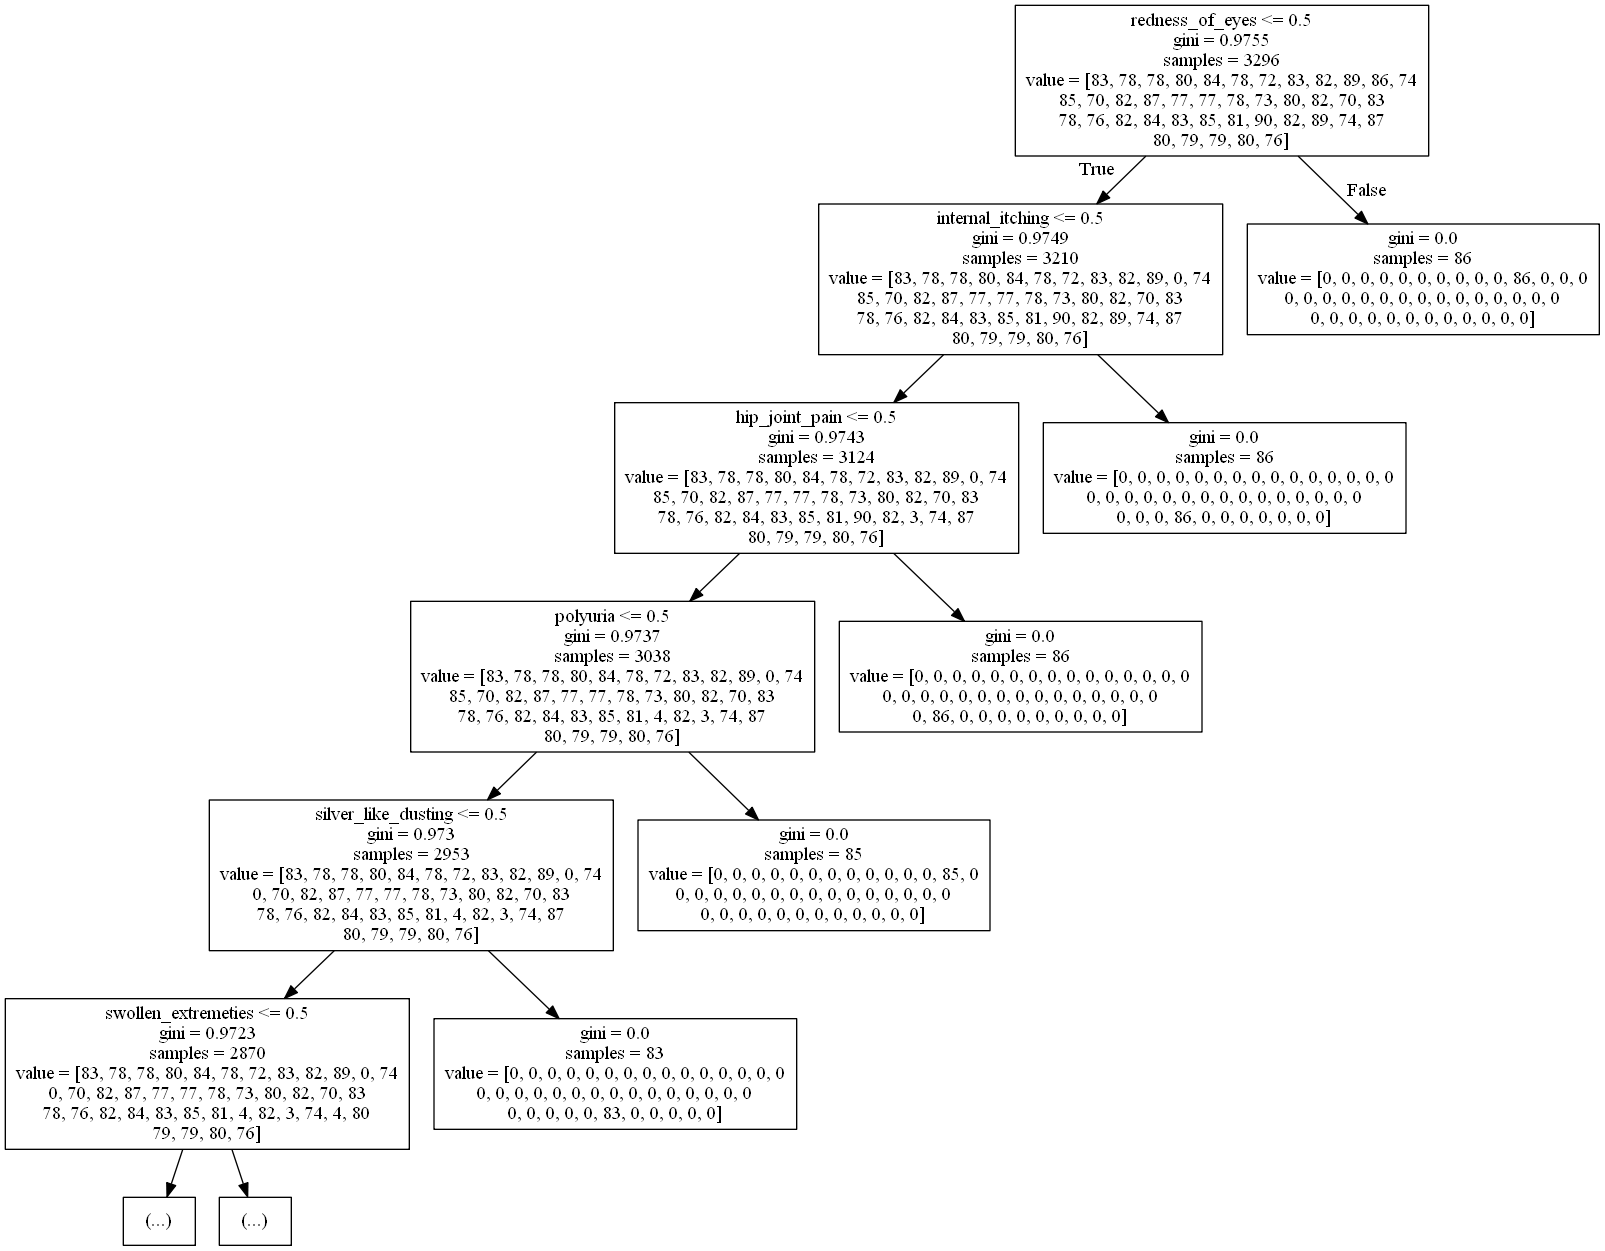

In [87]:
from IPython.display import Image
Image(filename='tree-top5.png')

The redness_of_eyes is the top symptom that has the highest [Gini impurity](https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity) score of 0.9755. Then comes internal_itchiness with a score of 0.9749 and so on. Basically this implies that the redness_of_eyes symptom has the potential to divide most samples into particular classes and hence is selected as the root of the decision tree. From there we move down with decreasing order of Gini scores.

In [88]:
feature_dict = {}
for i,f in enumerate(features):
    feature_dict[f] = i

In [96]:
feature_dict['hip_joint_pain']

79

In [102]:
print feature_dict

{'history_of_alcohol_consumption': 116, 'shivering': 4, 'inflammatory_nails': 128, 'dehydration': 29, 'pain_behind_the_eyes': 36, 'blood_in_sputum': 118, 'loss_of_smell': 88, 'lack_of_concentration': 109, 'unsteadiness': 86, 'drying_and_tingling_lips': 76, 'high_fever': 25, 'red_sore_around_nose': 130, 'stiff_neck': 81, 'yellowish_skin': 32, 'yellow_crust_ooze': 131, 'excessive_hunger': 74, 'skin_rash': 1, 'malaise': 48, 'nodal_skin_eruptions': 2, 'sunken_eyes': 26, 'stomach_bleeding': 114, 'nausea': 34, 'silver_like_dusting': 126, 'hip_joint_pain': 79, 'swelling_joints': 82, 'neck_pain': 63, 'mood_swings': 18, 'obesity': 67, 'diarrhoea': 40, 'slurred_speech': 77, 'lethargy': 21, 'constipation': 38, 'altered_sensorium': 98, 'dark_urine': 33, 'increased_appetite': 104, 'continuous_sneezing': 3, 'spinning_movements': 84, 'skin_peeling': 125, 'depression': 95, 'enlarged_thyroid': 71, 'irregular_sugar_level': 23, 'swollen_blood_vessels': 69, 'throat_irritation': 51, 'loss_of_balance': 85, 

In [116]:
sample_x = [i/52 if i ==52 else i*0 for i in range(len(features))]

This means predicting the disease where the only symptom is redness_of_eyes.

In [117]:
len(sample_x)

132

In [118]:
sample_x = np.array(sample_x).reshape(1,len(sample_x))

In [119]:
dt.predict(sample_x)

array(['Diabetes '], dtype=object)

In [120]:
dt.predict_proba(sample_x)

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.]])

Hence it has 100% confidence that the disease would be Common Cold. The prediction would improve once we take more symptoms as input.

<hr>